In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import signal

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
abNormalhHeartData = pd.read_csv('/content/drive/MyDrive/ptbdb_abnormal.csv', header=None)
normalhHeartData = pd.read_csv('/content/drive/MyDrive/ptbdb_normal.csv', header=None)

print('Abnormal heart data information')
abNormalhHeartData.info()

print('Normal heart data information')
normalhHeartData.info()

Abnormal heart data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 15.1 MB
Normal heart data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 5.8 MB


In [ ]:
abNormalhHeartData

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10504,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
abNormalhHeartData.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
normalhHeartData.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


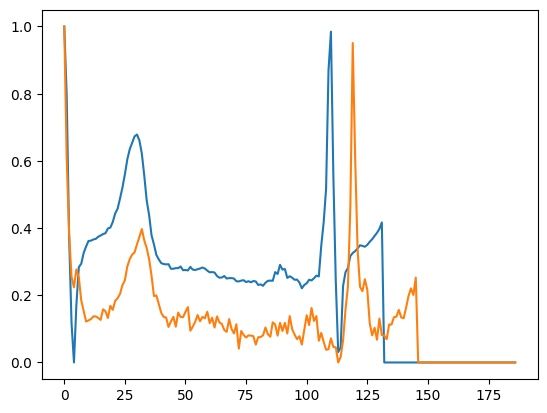

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



data_pt = pd.concat([abNormalhHeartData, normalhHeartData], axis=0)
data_n = data_pt.to_numpy()
data_n_x = data_n[:, :-1]
data_n_y = data_n[:, -1].astype(int)  # utiliser data_n au lieu de data_pt

x = np.arange(0, 187)
P0 = np.argwhere(data_n_y == 0).flatten()
P1 = np.argwhere(data_n_y == 1).flatten()

plt.plot(x, data_n_x[P0, :][1])
plt.plot(x, data_n_x[P1, :][1])
plt.show()

In [ ]:
plt.figure(figsize=(7,7))

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7fddfeddc670>,
 [Text(-0.7063789295915316, 0.8432252414563516, 'abnormal'),
  Text(0.7063789295915318, -0.8432252414563512, 'normal')],
 [Text(-0.3852975979590172, 0.4599410407943735, '72.2%'),
  Text(0.38529759795901736, -0.45994104079437337, '27.8%')])

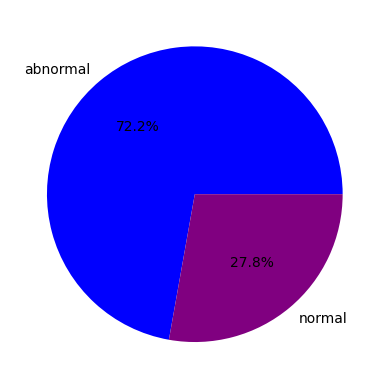

In [ ]:
plt.pie(data_pt[187].value_counts(), labels =["abnormal","normal"],colors= ['blue','purple'],autopct='%3.1f%%')

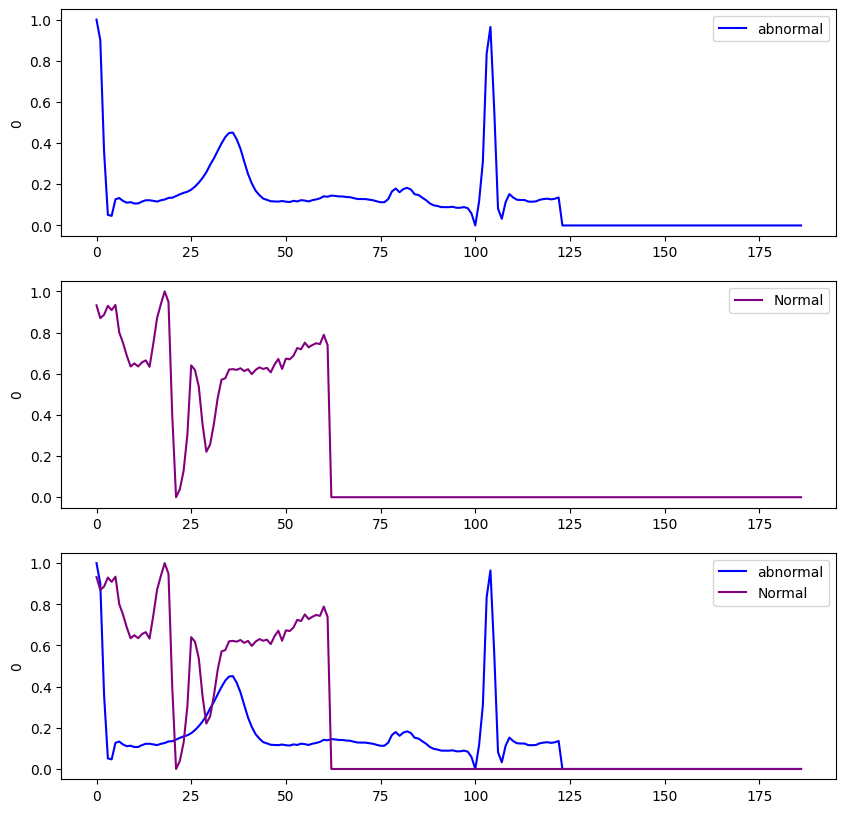

In [ ]:
color = ['blue','purple']
label = ["abnormal","Normal"]
fig, ax = plt.subplots(3, figsize=(10, 10))
df = pd.concat([abNormalhHeartData, normalhHeartData])

for i in range(2):
    t = sns.lineplot((df[df[187] == i].iloc[0])[:-1], label=label[i], color=color[i], ax=ax[i])
    t = sns.lineplot((df[df[187] == i].iloc[0])[:-1], label=label[i], color=color[i], ax=ax[2])

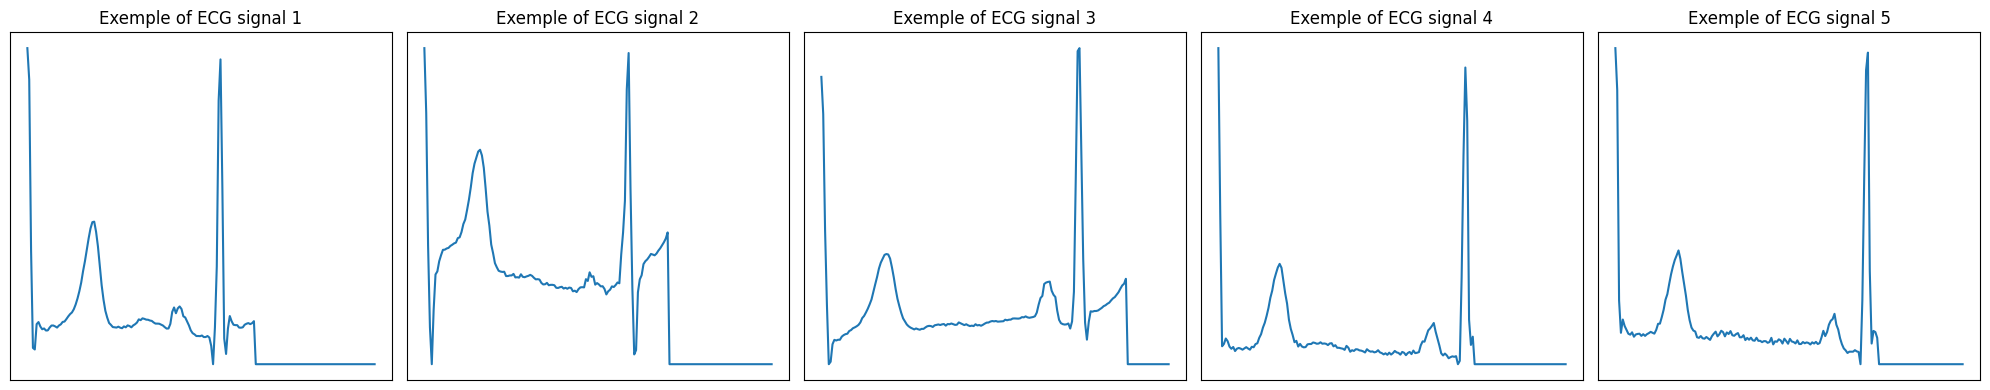

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
for i in range(5):

    axs[i].plot(normalhHeartData.iloc[i])
    axs[i].set_title(f"Exemple of ECG signal {i+1}")

    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
plt.show()

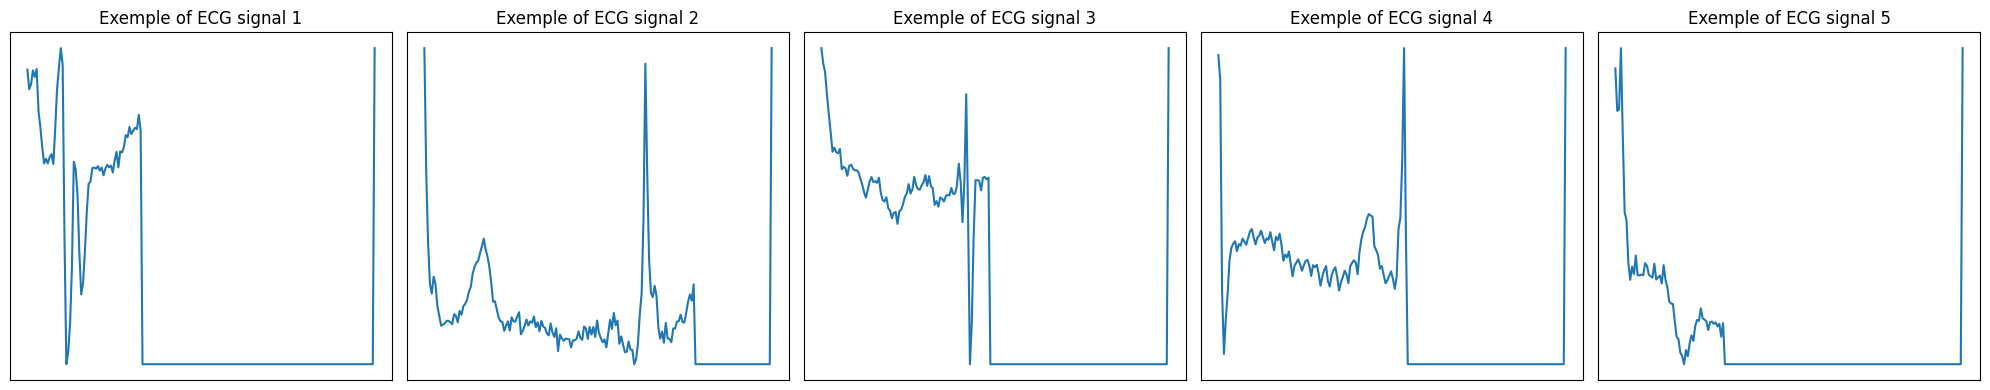

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
for i in range(5):

    axs[i].plot(abNormalhHeartData.iloc[i])
    axs[i].set_title(f"Exemple of ECG signal {i+1}")

    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
plt.show()

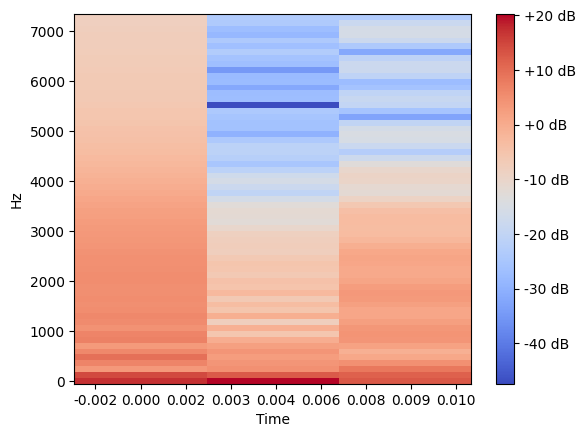

In [ ]:
import numpy as np
import librosa

# Load the data (replace `data` with your own ECG signal data)
data = np.array(normalhHeartData.iloc[0])
data1= np.array(normalhHeartData.iloc[1])
data2 = np.array(normalhHeartData.iloc[2])
data3 = np.array(normalhHeartData.iloc[3])

# Define STFT parameters
n_fft = 125
hop_length = 64
sampling_rate = 14552
# Compute STFT
stft = librosa.stft(data, n_fft=n_fft, hop_length=hop_length)

# Convert complex values to magnitudes

mag = np.abs(stft)

# Visualize STFT as a heatmap

librosa.display.specshow(librosa.amplitude_to_db(mag), sr=sampling_rate, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')

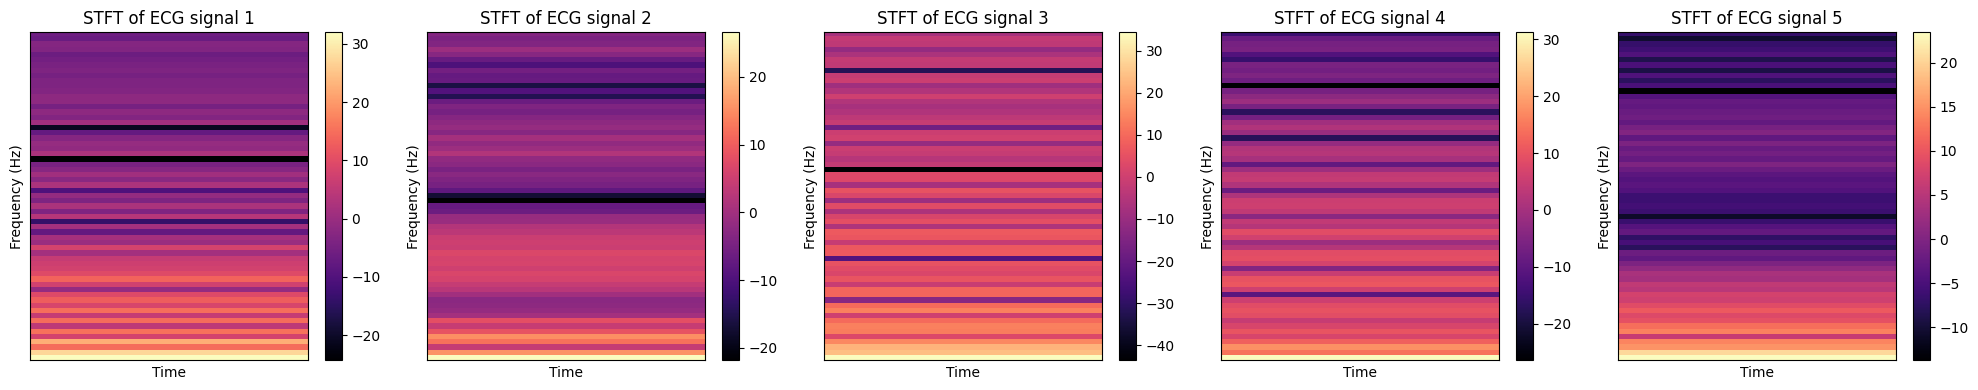

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
# Define STFT parameters
n_fft = 125
hop_length = 64

# Create a figure with 5 subplots arranged horizontally
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

# Loop through 5 rows of "train" data and plot STFTs in the subplots
for i in range(5):
    # Load the data
    data = np.array(abNormalhHeartData.iloc[i].values.flatten().tolist())

    # Compute FFT of the data
    fft_data = np.fft.fft(data)

    # Compute the STFT using sliding windows
    n_frames = 1 + (len(data) - n_fft) // hop_length
    stft = np.zeros((n_fft // 2 + 1, n_frames), dtype=complex)
    for j in range(n_frames):
        frame = data[j * hop_length : j * hop_length + n_fft]
        fft_frame = np.fft.fft(frame)
        stft[:, j] = fft_frame[: n_fft // 2 + 1]

    # Convert complex values to magnitudes
    mag = np.abs(stft)

    # Visualize STFT as a heatmap
    axs[i].imshow(20 * np.log10(mag), cmap='magma', origin='lower', aspect='auto')
    axs[i].set_title(f"STFT of ECG signal {i+1}")
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel("Frequency (Hz)")
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    plt.colorbar(axs[i].imshow(20 * np.log10(mag), cmap='magma', origin='lower', aspect='auto'), ax=axs[i])

plt.tight_layout()
plt.show()


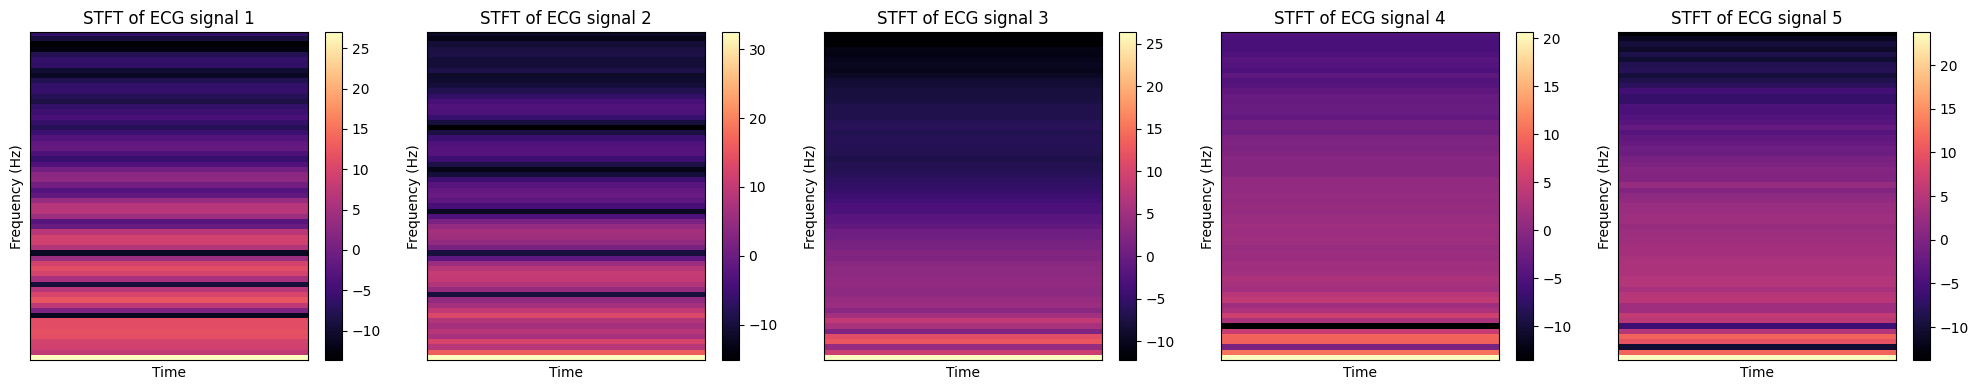

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
# Define STFT parameters
n_fft = 125
hop_length = 64

# Create a figure with 5 subplots arranged horizontally
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

# Loop through 5 rows of "train" data and plot STFTs in the subplots
for i in range(5):
    # Load the data
    data = np.array(normalhHeartData.iloc[i].values.flatten().tolist())

    # Compute FFT of the data
    fft_data = np.fft.fft(data)

    # Compute the STFT using sliding windows
    n_frames = 1 + (len(data) - n_fft) // hop_length
    stft = np.zeros((n_fft // 2 + 1, n_frames), dtype=complex)
    for j in range(n_frames):
        frame = data[j * hop_length : j * hop_length + n_fft]
        fft_frame = np.fft.fft(frame)
        stft[:, j] = fft_frame[: n_fft // 2 + 1]

    # Convert complex values to magnitudes
    mag = np.abs(stft)

    # Visualize STFT as a heatmap
    axs[i].imshow(20 * np.log10(mag), cmap='magma', origin='lower', aspect='auto')
    axs[i].set_title(f"STFT of ECG signal {i+1}")
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel("Frequency (Hz)")
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    plt.colorbar(axs[i].imshow(20 * np.log10(mag), cmap='magma', origin='lower', aspect='auto'), ax=axs[i])

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Define STFT parameters
n_fft = 125
hop_length = 64

# Loop through all rows of "abNormalhHeartData" data and plot STFTs as PNG images
for i in range(len(abNormalhHeartData)):
    # Load the data
    data = np.array(abNormalhHeartData.iloc[i].values.flatten().tolist())

    # Compute FFT of the data
    fft_data = np.fft.fft(data)

    # Compute the STFT using sliding windows
    n_frames = 1 + (len(data) - n_fft) // hop_length
    stft = np.zeros((n_fft // 2 + 1, n_frames), dtype=complex)
    for j in range(n_frames):
        frame = data[j * hop_length : j * hop_length + n_fft]
        fft_frame = np.fft.fft(frame)
        stft[:, j] = fft_frame[: n_fft // 2 + 1]

    # Convert complex values to magnitudes
    mag = np.abs(stft)

    # Visualize STFT as a heatmap and save as a PNG image
    plt.imshow(20 * np.log10(mag), cmap='magma', origin='lower', aspect='auto')
    plt.axis('off')
    plt.savefig(os.path.join('/content/drive/MyDrive/sujet_abnormal', f'figlog_{i}.png'), bbox_inches='tight', pad_inches=0, dpi=100)
    plt.clf()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Define STFT parameters
n_fft = 125
hop_length = 64

# Loop through all rows of "abNormalhHeartData" data and plot STFTs as PNG images
for i in range(len(normalhHeartData)):
    # Load the data
    data = np.array(normalhHeartData.iloc[i].values.flatten().tolist())

    # Compute FFT of the data
    fft_data = np.fft.fft(data)

    # Compute the STFT using sliding windows
    n_frames = 1 + (len(data) - n_fft) // hop_length
    stft = np.zeros((n_fft // 2 + 1, n_frames), dtype=complex)
    for j in range(n_frames):
        frame = data[j * hop_length : j * hop_length + n_fft]
        fft_frame = np.fft.fft(frame)
        stft[:, j] = fft_frame[: n_fft // 2 + 1]

    # Convert complex values to magnitudes
    mag = np.abs(stft)

    # Visualize STFT as a heatmap and save as a PNG image
    plt.imshow(20 * np.log10(mag), cmap='magma', origin='lower', aspect='auto')
    plt.axis('off')
    plt.savefig(os.path.join('/content/drive/MyDrive/Base de données/sujet_normal', f'figlog_{i}.png'), bbox_inches='tight', pad_inches=0, dpi=100)
    plt.clf()


In [ ]:
import tensorflow as tf
ecg_data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Base de données')

Found 14552 files belonging to 2 classes.


In [ ]:
data_iterator=ecg_data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
len(batch)

2

In [ ]:
batch[0]

array([[[[132.,  38., 129.],
         [132.,  38., 129.],
         [132.,  38., 129.],
         ...,
         [132.,  38., 129.],
         [132.,  38., 129.],
         [132.,  38., 129.]],

        [[132.,  38., 129.],
         [132.,  38., 129.],
         [132.,  38., 129.],
         ...,
         [132.,  38., 129.],
         [132.,  38., 129.],
         [132.,  38., 129.]],

        [[132.,  38., 129.],
         [132.,  38., 129.],
         [132.,  38., 129.],
         ...,
         [132.,  38., 129.],
         [132.,  38., 129.],
         [132.,  38., 129.]],

        ...,

        [[251., 252., 191.],
         [251., 252., 191.],
         [251., 252., 191.],
         ...,
         [251., 252., 191.],
         [251., 252., 191.],
         [251., 252., 191.]],

        [[251., 252., 191.],
         [251., 252., 191.],
         [251., 252., 191.],
         ...,
         [251., 252., 191.],
         [251., 252., 191.],
         [251., 252., 191.]],

        [[251., 252., 191.],
       

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[1]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int32)

In [ ]:
len(ecg_data)

455

In [ ]:
size_of_train = int(len(ecg_data)*.6)
size_of_val = int(len(ecg_data)*.3)+1
size_of_test = int(len(ecg_data)*.1)

In [ ]:
size_of_train

273

In [ ]:
size_of_val

137

In [ ]:
size_of_test

45

In [ ]:
train = ecg_data.take(size_of_train)
val = ecg_data.skip(size_of_train).take(size_of_val)
test = ecg_data.skip(size_of_train+size_of_val).take(size_of_test)

Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(20, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(14, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 20)      560       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 20)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      5792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 14)        4046      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 14)       0

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuarcy')==1.0):
            print("\nAccuarcy is greater than or equal to 0.99")
            self.model.stop_training=True;

ecg_callbacks=myCallback()

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[ecg_callbacks])

Test


In [ ]:
import cv2

def ECG_Classifier(img_path):
    img = cv2.imread(os.path.join(img_path))
    resize = tf.image.resize(img, (256,256))
    yhat = new_model.predict(np.expand_dims(resize/255, 0))
    yhat = float(yhat)*2
    if yhat > 0.5:
        ecg_class='Predicted class is Normal'
    else:
        ecg_class='Predicted class is Abnormal'
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB ))
    plt.title(ecg_class)
    plt.show()


1/1 [==============================] - 0s 208ms/step


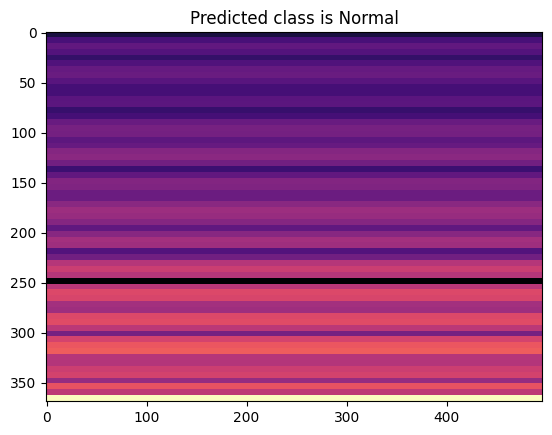

In [ ]:
import os
img_path='/content/drive/MyDrive/Base de données/sujet_normal/figlog_1010.png'
ECG_Classifier(img_path)

1/1 [==============================] - 0s 82ms/step


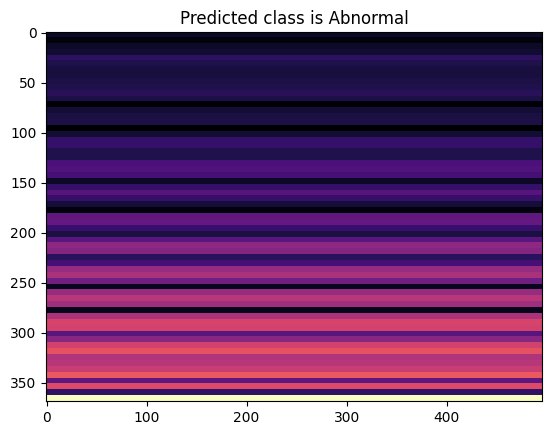

In [ ]:
import os
img_path='/content/drive/MyDrive/Base de données/sujet_abnormal/figlog_1440.png'
ECG_Classifier(img_path)

save Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','ECG_Classifier.h5'))

In [ ]:
new_model = load_model('./models/ECG_Classifier.h5')
